In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib

matplotlib.rcParams['font.sans-serif']  = 'Roboto'
matplotlib.rcParams['font.family'] = "sans-serif"

In [56]:
examples = {
    '9347':"A", 
    '9919':"B",
    '1852':"C",
    '752':"D",
    '9901':"E"
}

## Global Scree

In [57]:
scree = pd.DataFrame(columns=["Variance","Principal Component", "Dataset"])
pc_list = ['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8']

# Partial PCA on all features

In [58]:
india_pca = pd.read_csv('./data/all_india_full.csv')
subset_pca = pd.DataFrame(columns=india_pca.columns)

# Filter for Non-Tribal, Non-austroasiatic
for i, row in india_pca.iterrows():
    if row['language']!='Austroasiatic' and row['people']!='Tribal':
        subset_pca = subset_pca.append(row)

In [59]:
subset_pca = subset_pca.reset_index()
codings = subset_pca

In [60]:
features = ['cv_'+str(i+1) for i in range(37)]
# Separating out the features
x = codings.loc[:, features].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['language']].values

In [61]:
x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

pc1 = 'Vocal Complexity'
pc2 = 'Orchestral Complexity'

principalDf = pd.DataFrame(data = principalComponents
             , columns = [pc1, pc2])

finalDf = pd.concat([principalDf, codings['language']], axis = 1)

## Scree

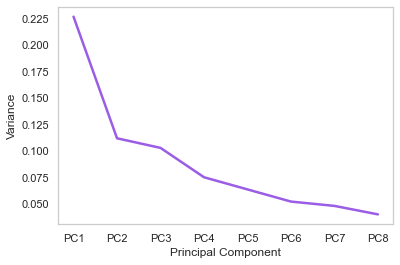

In [62]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
plt.figure(figsize=(6,4))
df = pd.DataFrame({
             'Variance':pca.explained_variance_ratio_,
             'Principal Component':pc_list,
             'Dataset' : ['Partial dataset, all features' for i in range(0,8)]
            }) 
sns.set(font='Roboto')
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(x='Principal Component',y="Variance", 
           data=df, color="#9B5DE5", linewidth=2.5)
scree = scree.append(df, ignore_index=True)
plt.savefig("./figs/scree/partial_recordings_all_feat.png")

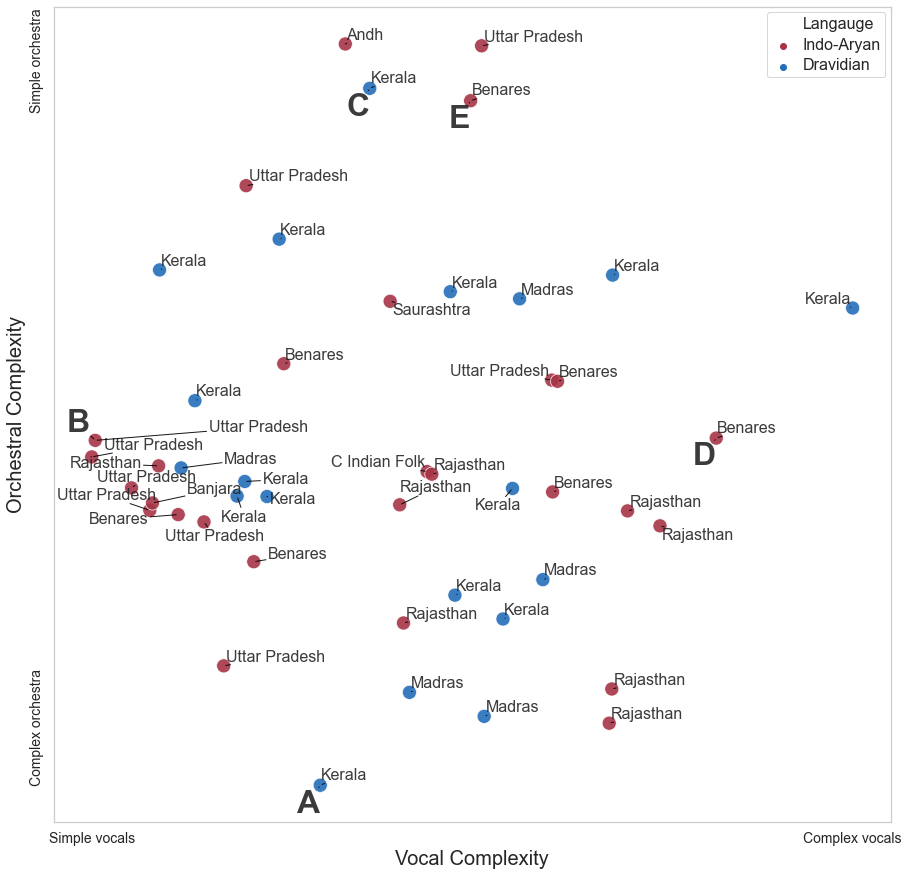

In [63]:
codings = codings.rename(columns = {'language':'Langauge'})
codings = codings.replace({'Indo-European':'Indo-Aryan'})

fig = plt.figure(figsize = (15,15))
matplotlib.rcParams['font.size'] = 16

#turn off grid
sns.set_style("whitegrid", {'axes.grid' : False})

#define targets for colors
targets = codings['Langauge']

ax = sns.scatterplot(finalDf.loc[:, pc1],
                     finalDf.loc[:, pc2], 
                     palette=['#A63446', '#246EB9'], alpha=.9, hue=targets, s=200)

#axis labels
ax.set_xlabel(pc1, fontsize=20) 
ax.set_ylabel(pc2, fontsize=20)

#legend
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text        

plt.xticks((finalDf[pc1].min(),finalDf[pc1].max()), 
           ('Simple vocals', 'Complex vocals'), 
           fontsize=14)

plt.yticks((finalDf[pc2].min(),finalDf[pc2].max()-.8), 
           ('Complex orchestra', 'Simple orchestra'), 
           rotation='vertical', va='bottom',fontsize=14)
#annotations
texts = [plt.text(finalDf.loc[line, pc1], 
                  finalDf.loc[line, pc2], 
                  codings.loc[line, 'culture'], 
                  ha='center', va='center', alpha=.9, 
                  weight='light', size='medium') 
         for line in range(0,codings.shape[0])]

labels = []

for line in range(0,codings.shape[0]):
    coding = codings.loc[line, 'canto_coding_id']
    if str(coding) in examples.keys():
        labels.append(plt.text(finalDf.loc[line, pc1], 
                  finalDf.loc[line, pc2], 
                  examples[str(coding)], 
                  ha='center', va='center', alpha=.9, 
                  weight='bold', size='large', fontsize=32))

#adjust annotations
adjust_text(texts+labels, arrowprops=dict(arrowstyle='-', alpha=.9, color='black'))     
#save to disk
plt.savefig("./figs/pca/partial_recordings_all_feat.png")

## Explained Variance

In [64]:
pca.explained_variance_

array([8.56953178, 4.22720946, 3.88430132, 2.83625098, 2.40151887,
       1.9675631 , 1.8129038 , 1.51031548])

In [65]:
pca.explained_variance_ratio_

array([0.22681154, 0.11188241, 0.10280659, 0.07506763, 0.06356149,
       0.05207589, 0.04798249, 0.03997383])

## Variable Loadings

In [66]:
line_metadata = pd.read_csv('./line_metadata.csv')
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=line_metadata['var_title'])
loadings.to_csv('./output/loadings/partial_recordings_all_feat.csv')
subset_loadings = loadings

# Full PCA on all features

In [67]:
india_pca = pd.read_csv('./data/all_india_full.csv')
codings = india_pca

In [68]:
x = codings.loc[:, features].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['language']].values

In [69]:
pc1 = 'Melodic Complexity'
pc2 = 'Vocal Style'

x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = [pc1, pc2])

finalDf = pd.concat([principalDf, codings['language']], axis = 1)

In [70]:
finalDf.to_csv('./data/pca_coords.csv')
finalDf['Vocal Style'] = finalDf['Vocal Style']*-1

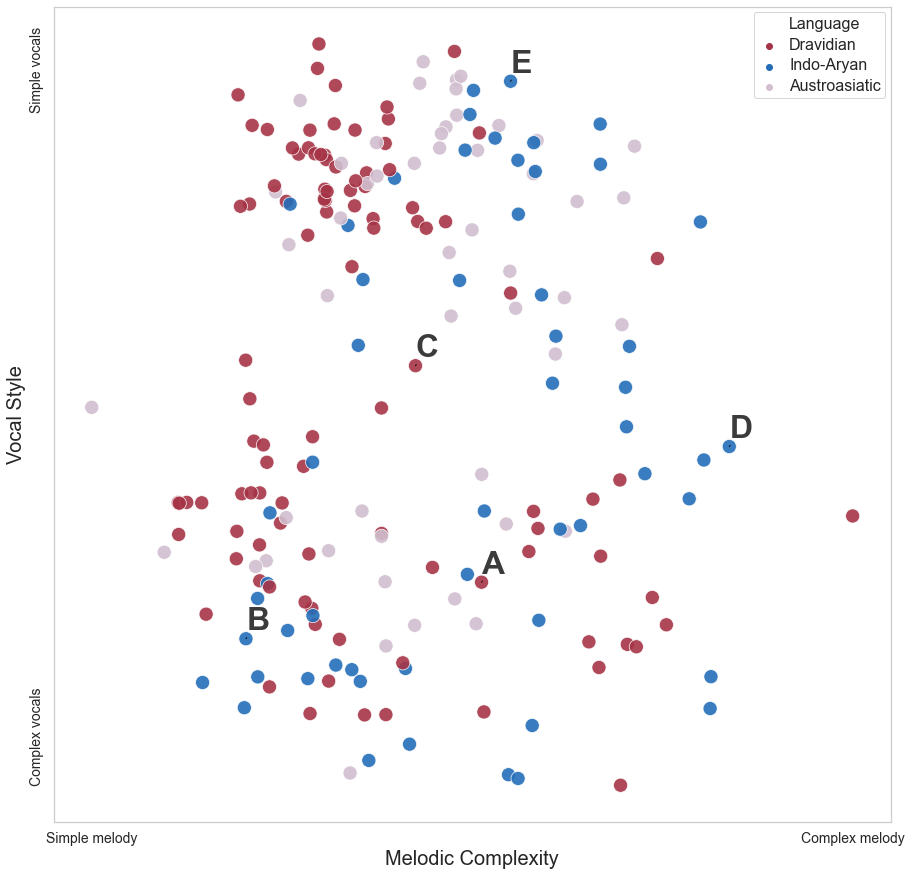

In [71]:
codings = codings.rename(columns = {'language':'Language'})
codings = codings.replace({'Indo-European':'Indo-Aryan'})


fig = plt.figure(figsize = (15,15))
matplotlib.rcParams['font.size'] = 16

#turn off grid
sns.set_style("whitegrid", {'axes.grid' : False})

#define targets for colors
targets = codings['Language']

ax = sns.scatterplot(finalDf.loc[:, pc1],
                     finalDf.loc[:, pc2], 
                     palette=['#A63446', '#246EB9', '#D1BECF'], alpha=.9, hue=targets, s=200)

#axis labels
ax.set_xlabel(pc1, fontsize=20) 
ax.set_ylabel(pc2, fontsize=20)

#legend
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text        

plt.xticks((finalDf[pc1].min(),finalDf[pc1].max()), 
           ('Simple melody', 'Complex melody'), 
           fontsize=14)

plt.yticks((finalDf[pc2].min(),finalDf[pc2].max()-.8), 
           ('Complex vocals', 'Simple vocals'), 
           rotation='vertical', va='bottom',fontsize=14)     

labels = []

for line in range(0,codings.shape[0]):
    coding = codings.loc[line, 'canto_coding_id']
    if str(coding) in examples.keys():
        labels.append(plt.text(finalDf.loc[line, pc1], 
                  finalDf.loc[line, pc2], 
                  examples[str(coding)], 
                  ha='center', va='center', alpha=.9, 
                  weight='bold', size='large', fontsize=32))

#adjust annotations
adjust_text(labels, arrowprops=dict(arrowstyle='-', alpha=.9, color='black'))    

#save to disk
plt.savefig("./figs/pca/all_recordings_all_feat.png")

## Explained Variance

In [72]:
pca.explained_variance_

array([6.30524733, 6.19551102])

In [73]:
pca.explained_variance_ratio_

array([0.16961099, 0.16665908])

## Variable Loadings

In [74]:
line_metadata = pd.read_csv('./line_metadata.csv')

In [75]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=line_metadata['var_title'])
loadings.to_csv('./output/loadings/all_recordings_all_feat.csv')
full_loadings = loadings

## Scree Plot

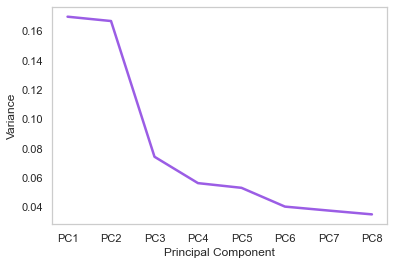

In [76]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
plt.figure(figsize=(6,4))
df = pd.DataFrame({
             'Variance':pca.explained_variance_ratio_,
             'Principal Component':pc_list,
             'Dataset' : ['Full dataset, all features' for i in range(0,8)]
            }) 
sns.set(font='Roboto')
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(x='Principal Component',y="Variance", 
           data=df, color="#9B5DE5", linewidth=2.5)
scree = scree.append(df, ignore_index=True)
plt.savefig("./figs/scree/all_recordings_all_feat.png")

In [77]:
all_loadings = pd.concat([subset_loadings, full_loadings], axis=1).reset_index()
all_loadings.columns = ['Title','Subset PC1','Subset PC2','Full PC1','Full PC2']
all_loadings.index = np.arange(1, len(all_loadings) + 1)
all_loadings.index.name = 'Line'
all_loadings = all_loadings.round(2)
all_loadings.reindex(all_loadings['Subset PC1'].abs().sort_values(ascending=False).index)
all_loadings.to_csv('./output/loadings/all_loadings.csv')

# Full PCA on subset of features

In [78]:
drop_features = ['cv_1','cv_5','cv_6','cv_12','cv_22','cv_2','cv_3','cv_8','cv_9','cv_13','cv_14','cv_27']
subset = []
numbers = []
for i in range(1,38):
    feature = 'cv_'+str(i)
    if feature not in drop_features:
        subset.append(feature)
        numbers.append(i)

In [79]:
india_pca = pd.read_csv('./data/all_india_full.csv')
codings = india_pca
x = codings.loc[:, subset].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['language']].values

In [80]:
x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

pc1 = 'Ornamentation'
pc2 = 'Vocal Complexity'

principalDf = pd.DataFrame(data = principalComponents
             , columns = [pc1, pc2])

finalDf = pd.concat([principalDf, codings['language']], axis = 1)

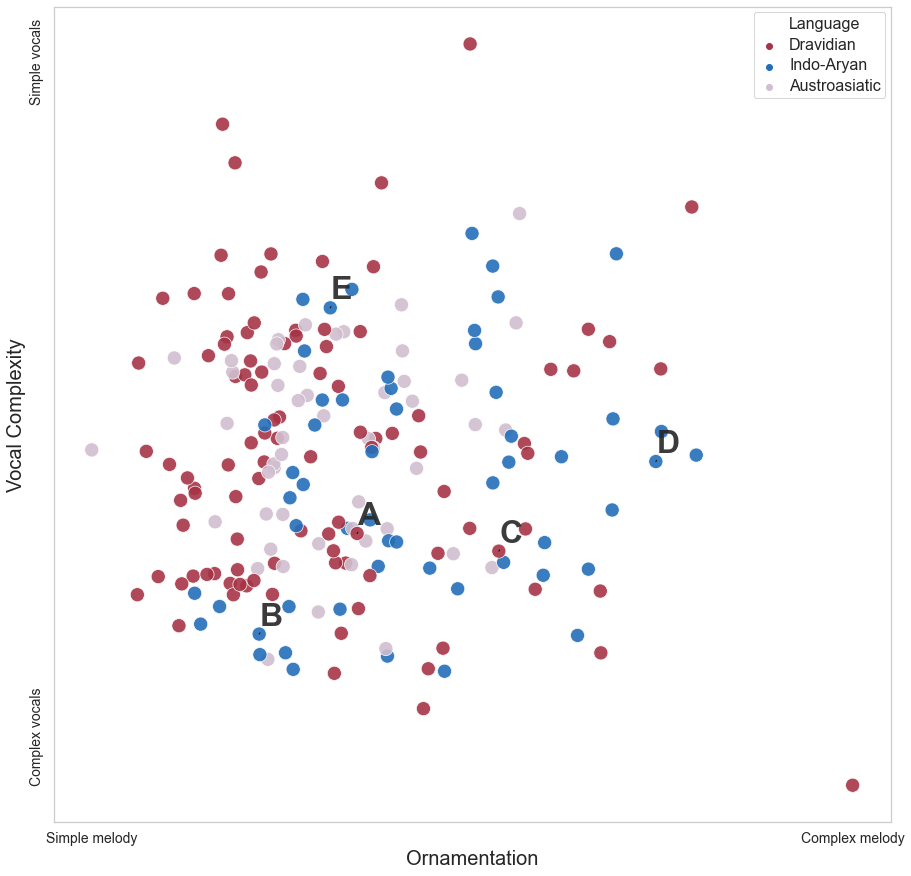

In [81]:
codings = codings.rename(columns = {'language':'Language'})
codings = codings.replace({'Indo-European':'Indo-Aryan'})


fig = plt.figure(figsize = (15,15))
matplotlib.rcParams['font.size'] = 16

#turn off grid
sns.set_style("whitegrid", {'axes.grid' : False})

#define targets for colors
targets = codings['Language']

ax = sns.scatterplot(finalDf.loc[:, pc1],
                     finalDf.loc[:, pc2], 
                     palette=['#A63446', '#246EB9', '#D1BECF'], alpha=.9, hue=targets, s=200)

#axis labels
ax.set_xlabel(pc1, fontsize=20) 
ax.set_ylabel(pc2, fontsize=20)

#legend
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text        

plt.xticks((finalDf[pc1].min(),finalDf[pc1].max()), 
           ('Simple melody', 'Complex melody'), 
           fontsize=14)

plt.yticks((finalDf[pc2].min(),finalDf[pc2].max()-.8), 
           ('Complex vocals', 'Simple vocals'), 
           rotation='vertical', va='bottom',fontsize=14)                       

labels = []

for line in range(0,codings.shape[0]):
    coding = codings.loc[line, 'canto_coding_id']
    if str(coding) in examples.keys():
        labels.append(plt.text(finalDf.loc[line, pc1], 
                  finalDf.loc[line, pc2], 
                  examples[str(coding)], 
                  ha='center', va='center', alpha=.9, 
                  weight='bold', size='large', fontsize=32))
        

#adjust annotations
adjust_text(labels, arrowprops=dict(arrowstyle='-', alpha=.9, color='black'))    

#save to disk
plt.savefig("./figs/pca/all_recordings_subset_feat.png")

## Explained Variance

In [82]:
pca.explained_variance_

array([4.99901588, 2.64689539])

In [83]:
pca.explained_variance_ratio_

array([0.19899464, 0.10536434])

## Loadings

In [84]:
subset_metadata = pd.DataFrame(columns=line_metadata.columns)
for i, row in line_metadata.iterrows():
    if (i+1) in numbers:
        subset_metadata = subset_metadata.append(row)

In [85]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=subset_metadata['var_title'])
loadings.to_csv('./output/loadings/all_recordings_subset_feat.csv')

## Scree

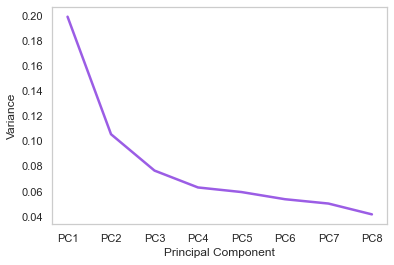

In [86]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
plt.figure(figsize=(6,4))
df = pd.DataFrame({
             'Variance':pca.explained_variance_ratio_,
             'Principal Component':pc_list,
             'Dataset' : ['Full dataset, partial features' for i in range(0,8)]
            }) 
sns.set(font='Roboto')
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(x='Principal Component',y="Variance", 
           data=df, color="#9B5DE5", linewidth=2.5)
scree = scree.append(df, ignore_index=True)
plt.savefig("./figs/scree/all_recordings_subset_feat.png")

# Partial PCA on subset of features

In [87]:
india_pca = pd.read_csv('./data/all_india_full.csv')
subset_pca = pd.DataFrame(columns=india_pca.columns)

# Filter for Non-Tribal, Non-austroasiatic
for i, row in india_pca.iterrows():
    if row['language']!='Austroasiatic' and row['people']!='Tribal':
        subset_pca = subset_pca.append(row)

subset_pca = subset_pca.reset_index()
codings = subset_pca

# remove outlier
for i, row in codings.iterrows():
    if row['canto_coding_id'] == 9193:
        index = i
if index:                                                     
    codings = codings.drop(codings.index[index]).reset_index(drop=True)

In [88]:
# Separating out the features
x = codings.loc[:, subset].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['region']].values

In [89]:
pc1 = 'Musical structure'
pc2 = 'Dynamics'

x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = [pc1, pc2])
finalDf = pd.concat([principalDf, codings['language']], axis = 1)

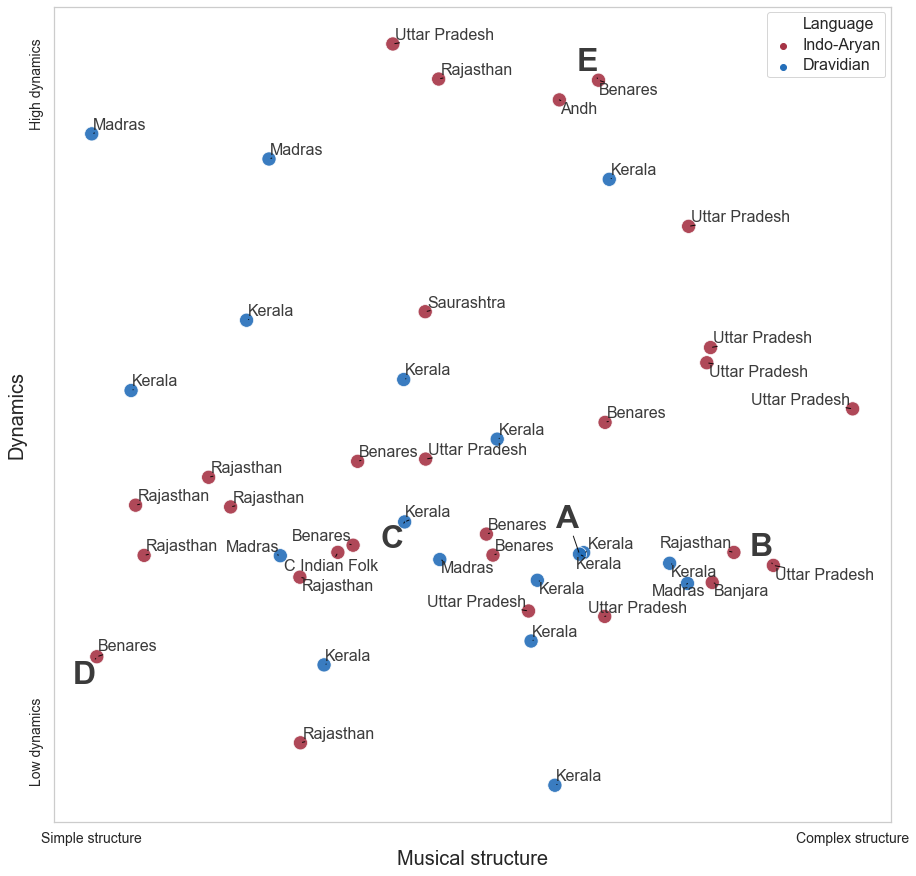

In [90]:
codings = codings.rename(columns = {'language':'Language'})
codings = codings.replace({'Indo-European':'Indo-Aryan'})


fig = plt.figure(figsize = (15,15))
matplotlib.rcParams['font.size'] = 16

#turn off grid
sns.set_style("whitegrid", {'axes.grid' : False})

#define targets for colors
targets = codings['Language']

ax = sns.scatterplot(finalDf.loc[:, pc1],
                     finalDf.loc[:, pc2], 
                     palette=['#A63446', '#246EB9'], alpha=.9, hue=targets, s=200)

#axis labels
ax.set_xlabel(pc1, fontsize=20) 
ax.set_ylabel(pc2, fontsize=20)

#legend
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text        

plt.xticks((finalDf[pc1].min(),finalDf[pc1].max()), 
           ('Simple structure', 'Complex structure'), 
           fontsize=14)

plt.yticks((finalDf[pc2].min(),finalDf[pc2].max()-.8), 
           ('Low dynamics', 'High dynamics'), 
           rotation='vertical', va='bottom',fontsize=14)                       

#annotations
texts = [plt.text(finalDf.loc[line, pc1], 
                  finalDf.loc[line, pc2], 
                  codings.loc[line, 'culture'], 
                  ha='center', va='center', alpha=.9, 
                  weight='light', size='medium') 
         for line in range(0,codings.shape[0])]

labels = []

for line in range(0,codings.shape[0]):
    coding = codings.loc[line, 'canto_coding_id']
    if str(coding) in examples.keys():
        labels.append(plt.text(finalDf.loc[line, pc1], 
                  finalDf.loc[line, pc2], 
                  examples[str(coding)], 
                  ha='center', va='center', alpha=.9, 
                  weight='bold', size='large', fontsize=32))

#adjust annotations
adjust_text(texts+labels, arrowprops=dict(arrowstyle='-', alpha=.9, color='black'))    

#save to disk
plt.savefig("./figs/pca/partial_recordings_subset_feat.png")

## Explained Variance

In [91]:
pca.explained_variance_

array([5.70079138, 2.94361739])

In [92]:
pca.explained_variance_ratio_

array([0.22307445, 0.11518503])

## Loadings

In [93]:
subset_metadata = pd.DataFrame(columns=line_metadata.columns)
for i, row in line_metadata.iterrows():
    if (i+1) in numbers:
        subset_metadata = subset_metadata.append(row)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=subset_metadata['var_title'])
loadings.to_csv('./output/loadings/partial_recordings_subset_feat.csv')

## Scree

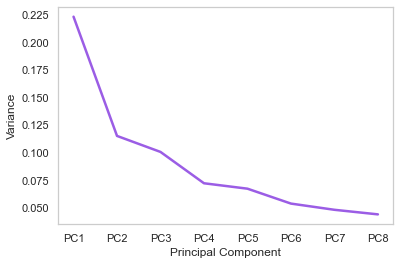

In [94]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
plt.figure(figsize=(6,4))
df = pd.DataFrame({
             'Variance':pca.explained_variance_ratio_,
             'Principal Component':pc_list,
             'Dataset' : ['Partial dataset, partial features' for i in range(0,8)]
            }) 
sns.set(font='Roboto')
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(x='Principal Component',y="Variance", 
           data=df, color="#9B5DE5", linewidth=2.5)
scree = scree.append(df, ignore_index=True)
plt.savefig("./figs/scree/partial_recordings_subset_feat.png")

# Full Scree

In [95]:
scree_pivot = scree.pivot("Principal Component", "Dataset", "Variance")

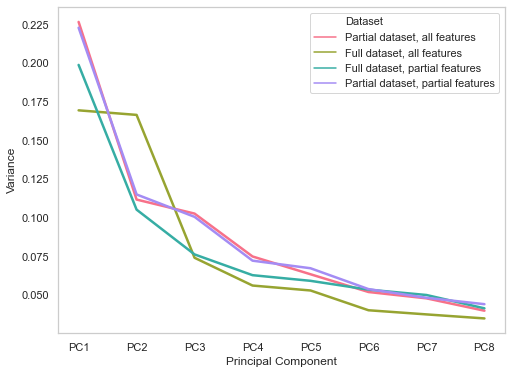

In [97]:
plt.figure(figsize=(8,6))
sns.lineplot(data=scree, x="Principal Component", y="Variance", hue="Dataset", palette="husl", linewidth=2.5)
plt.savefig("./figs/scree/full_scree.png")